In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. Install Ultralytics YOLOv8
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
# 3. Verify GPU
!nvidia-smi

Mon Apr 21 10:59:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# ----------------------------------------------
# STEP 5: Create data.yaml config
data_yaml = """
train: /content/drive/MyDrive/yolo_v8_only/person/images/train
val: /content/drive/MyDrive/yolo_v8_only/person/images/val

nc: 1
names: ['person']
"""

with open('/content/drive/MyDrive/yolo_v8_only/person/data.yaml', 'w') as f:
    f.write(data_yaml)


In [5]:
# ----------------------------------------------
# STEP 6: Train the YOLOv8 model with augmentation
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # You can use 'yolov8m.pt' for better generalization

model.train(
    data='/content/drive/MyDrive/yolo_v8_only/person/data.yaml',
    epochs=150,
    imgsz=640,
    batch=16,
    name='yolov8_person_mixed',
    project='/content/yolo_results',
    augment=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 248MB/s]


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolo_v8_only/person/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/yolo_results, name=yolov8_person_mixed, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.0±0.0 MB/s, size: 9.7 KB)


train: Scanning /content/drive/MyDrive/yolo_v8_only/person/labels/train... 4802 images, 481 backgrounds, 0 corrupt: 100%|██████████| 5283/5283 [42:34<00:00,  2.07it/s]


train: New cache created: /content/drive/MyDrive/yolo_v8_only/person/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ val: Slow image access detected (ping: 13.7±29.0 ms, read: 0.1±0.0 MB/s, size: 35.0 KB). Use local storage instead of remote/mounted storage for better performance. See https://docs.ultralytics.com/guides/model-training-tips/


val: Scanning /content/drive/MyDrive/yolo_v8_only/person/labels/val... 161 images, 1 backgrounds, 0 corrupt: 100%|██████████| 162/162 [01:18<00:00,  2.06it/s]

val: New cache created: /content/drive/MyDrive/yolo_v8_only/person/labels/val.cache


Plotting labels to /content/yolo_results/yolov8_person_mixed/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolo_results/yolov8_person_mixed
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.67G      1.736      2.037      2.161          4        640: 100%|██████████| 331/331 [02:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]


                   all        162        186      0.674      0.734      0.766       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.46G      1.404      1.285      1.829          9        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        162        186      0.905      0.704       0.83      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.49G      1.424      1.236      1.844          8        640: 100%|██████████| 331/331 [01:56<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        162        186      0.498      0.597      0.515      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.51G      1.449      1.248      1.859          9        640: 100%|██████████| 331/331 [01:54<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        162        186      0.828      0.699      0.746       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.53G      1.416      1.225      1.827          5        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        162        186      0.814      0.681      0.806      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.56G      1.381       1.17      1.794          5        640: 100%|██████████| 331/331 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]


                   all        162        186      0.825      0.762       0.89      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.58G      1.367      1.155       1.78         12        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        162        186      0.897      0.731      0.868       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.61G      1.351      1.115      1.771          9        640: 100%|██████████| 331/331 [01:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        162        186      0.871       0.86      0.912      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.62G      1.325      1.097      1.746          9        640: 100%|██████████| 331/331 [01:56<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        162        186      0.741      0.769      0.733       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.66G      1.315      1.065      1.735          7        640: 100%|██████████| 331/331 [01:54<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        162        186      0.925      0.871      0.929      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.68G      1.295      1.063      1.721          5        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        162        186      0.751      0.778      0.792      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.71G      1.287      1.066      1.714          3        640: 100%|██████████| 331/331 [01:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

                   all        162        186      0.896      0.866      0.923      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.72G      1.287      1.045      1.719          6        640: 100%|██████████| 331/331 [01:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]

                   all        162        186      0.951      0.952      0.982      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.75G      1.266      1.006      1.692          8        640: 100%|██████████| 331/331 [01:53<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        162        186      0.946      0.892      0.964      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.78G      1.253       1.01      1.688          5        640: 100%|██████████| 331/331 [01:53<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        162        186      0.946      0.935      0.973      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       4.8G      1.246      1.011       1.68          9        640: 100%|██████████| 331/331 [01:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all        162        186      0.924      0.882      0.919      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.82G      1.243     0.9998      1.685          9        640: 100%|██████████| 331/331 [01:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        162        186      0.945      0.919      0.959      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.85G      1.236     0.9947      1.679          7        640: 100%|██████████| 331/331 [01:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        162        186      0.945       0.93      0.977      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.88G      1.227     0.9821      1.673          6        640: 100%|██████████| 331/331 [01:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all        162        186      0.987      0.952      0.982      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       4.9G      1.227     0.9819      1.671         10        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        162        186      0.983      0.927      0.979      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.92G       1.22     0.9783      1.669          6        640: 100%|██████████| 331/331 [01:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        162        186      0.957      0.951      0.978      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.95G      1.218     0.9582       1.66          8        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        162        186      0.942      0.978       0.98      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.97G      1.211     0.9607      1.659          6        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all        162        186      0.943      0.976      0.987      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150         5G      1.208     0.9418      1.652          7        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all        162        186      0.978      0.941      0.985      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.02G      1.205     0.9522      1.649         10        640: 100%|██████████| 331/331 [01:56<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        162        186      0.983      0.943      0.987      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      5.05G      1.203     0.9476      1.648          9        640: 100%|██████████| 331/331 [01:57<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        162        186      0.952      0.955      0.979      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.07G      1.193     0.9477      1.637         10        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]

                   all        162        186       0.97      0.957      0.983       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       5.1G      1.194     0.9469      1.642          7        640: 100%|██████████| 331/331 [01:56<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        162        186      0.949      0.946      0.976      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.11G      1.187     0.9416      1.644          7        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        162        186      0.972      0.951      0.988      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.14G      1.181     0.9148      1.642          9        640: 100%|██████████| 331/331 [01:51<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]

                   all        162        186      0.978       0.96      0.987      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      5.17G      1.176     0.9323      1.633          9        640: 100%|██████████| 331/331 [01:51<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        162        186      0.962      0.951      0.978      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.19G      1.171     0.9298      1.621          9        640: 100%|██████████| 331/331 [01:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all        162        186      0.978      0.963      0.987      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.21G      1.173     0.9209      1.631         11        640: 100%|██████████| 331/331 [01:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        162        186      0.968      0.975      0.988      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.24G      1.172     0.9215      1.624          7        640: 100%|██████████| 331/331 [01:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        162        186      0.972      0.968       0.99       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.27G      1.175     0.9143      1.623          7        640: 100%|██████████| 331/331 [01:53<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        162        186      0.984      0.993      0.994      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.29G       1.16     0.9034      1.612          7        640: 100%|██████████| 331/331 [01:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.51it/s]

                   all        162        186      0.967      0.941      0.983      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.31G      1.156     0.9197      1.618          6        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        162        186      0.966      0.984      0.983      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.34G      1.157     0.9086      1.613         10        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        162        186      0.977      0.973      0.993      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.36G      1.161     0.9074       1.62          8        640: 100%|██████████| 331/331 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]

                   all        162        186      0.974      0.978      0.993      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.39G      1.158      0.892      1.617          4        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        162        186      0.968      0.976      0.983      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       5.4G      1.167     0.8997      1.621          6        640: 100%|██████████| 331/331 [01:54<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]

                   all        162        186      0.973      0.954       0.99       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.44G      1.159      0.894      1.614         10        640: 100%|██████████| 331/331 [01:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]

                   all        162        186      0.964      0.994      0.992      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.46G      1.147      0.901      1.613          7        640: 100%|██████████| 331/331 [01:53<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        162        186      0.975      0.957      0.991      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.48G      1.143      0.887      1.607          8        640: 100%|██████████| 331/331 [01:53<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        162        186      0.988      0.978      0.994      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       5.5G      1.141     0.9054      1.606          6        640: 100%|██████████| 331/331 [01:53<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]

                   all        162        186      0.983      0.951       0.99      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.53G       1.14     0.8927      1.604          9        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

                   all        162        186      0.982      0.968      0.988      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.56G      1.133     0.8937      1.598          7        640: 100%|██████████| 331/331 [01:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        162        186      0.978      0.978      0.989      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.58G      1.147     0.8681      1.611          6        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

                   all        162        186      0.988      0.978      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       5.6G      1.137     0.8817      1.597          7        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        162        186       0.99      0.978      0.994      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.63G      1.141     0.8814      1.601          9        640: 100%|██████████| 331/331 [01:53<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]

                   all        162        186      0.984      0.984      0.994       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.65G      1.139     0.8784      1.603          4        640: 100%|██████████| 331/331 [01:53<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        162        186      0.971      0.989      0.993      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.68G      1.147     0.8789      1.603          6        640: 100%|██████████| 331/331 [01:54<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        162        186      0.984      0.985      0.994      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       5.7G       1.13     0.8665      1.593          6        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        162        186       0.98      0.989      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.73G      1.123      0.865      1.593         10        640: 100%|██████████| 331/331 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        162        186      0.974      0.984      0.993      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.75G      1.127     0.8624      1.592         10        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all        162        186      0.984      0.978      0.993      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.78G      1.134     0.8688      1.597          4        640: 100%|██████████| 331/331 [01:58<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        162        186      0.983      0.989      0.994       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.79G      1.125     0.8817      1.592          6        640: 100%|██████████| 331/331 [01:57<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        162        186      0.988      0.984      0.994      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.86G      1.127     0.8664      1.594          6        640: 100%|██████████| 331/331 [01:56<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        162        186      0.994      0.978      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.88G      1.128     0.8841      1.599          7        640: 100%|██████████| 331/331 [01:58<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        162        186      0.968      0.989      0.992      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.94G      1.112      0.854      1.579         12        640: 100%|██████████| 331/331 [01:59<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        162        186      0.979      0.989      0.994      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.99G      1.128     0.8641      1.586         10        640: 100%|██████████| 331/331 [01:58<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        162        186      0.983      0.989      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      6.06G      1.121     0.8517      1.588         10        640: 100%|██████████| 331/331 [02:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        162        186      0.985      0.973      0.987      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      6.08G      1.123      0.843      1.586          9        640: 100%|██████████| 331/331 [01:58<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        162        186      0.981      0.989      0.994      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      6.11G      1.118     0.8407      1.583          9        640: 100%|██████████| 331/331 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        162        186      0.982      0.978      0.992      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      6.15G      1.112     0.8473      1.579          4        640: 100%|██████████| 331/331 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        162        186      0.979      0.982      0.989      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      6.22G      1.112     0.8437       1.58          8        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        162        186      0.989      0.988      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      6.24G      1.117     0.8489      1.581          9        640: 100%|██████████| 331/331 [01:55<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        162        186      0.977      0.995      0.994      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       6.3G      1.117     0.8462      1.584          7        640: 100%|██████████| 331/331 [01:55<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]

                   all        162        186      0.995      0.989      0.994      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.35G      1.105     0.8393      1.574          7        640: 100%|██████████| 331/331 [01:58<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        162        186      0.991      0.978      0.993      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.42G      1.117     0.8443       1.58          8        640: 100%|██████████| 331/331 [01:56<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]


                   all        162        186      0.973      0.995      0.992      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.44G      1.113     0.8284      1.582         11        640: 100%|██████████| 331/331 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        162        186      0.979      0.988      0.994      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      6.46G      1.109     0.8462      1.578          6        640: 100%|██████████| 331/331 [01:55<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        162        186      0.984      0.993      0.993      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      6.52G      1.098     0.8421      1.571         12        640: 100%|██████████| 331/331 [01:55<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        162        186      0.984          1      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      6.58G      1.097     0.8306      1.569          6        640: 100%|██████████| 331/331 [01:57<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all        162        186      0.977      0.995      0.993      0.685


FileNotFoundError: [Errno 2] No such file or directory: '/content/yolo_results/yolov8_person_mixed/results.csv'

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy the last checkpoint to Drive
# !cp runs/detect/train/weights/last.pt /content/drive/MyDrive/yolo_last.pt


Mounted at /content/drive


In [ ]:
!yolo detect train model='/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/last.pt' data='/content/drive/MyDrive/yolo_v8_only/person/data.yaml' epochs=76


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/last.pt, data=/content/drive/MyDrive/yolo_v8_only/person/data.yaml, epochs=76, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [ ]:
# ----------------------------------------------
# STEP 7: Validate on the real HumanBody1 validation set
metrics = model.val()
print(metrics)


In [5]:
# STEP 8: Run inference on custom test images
from ultralytics import YOLO
import os

# Load the best trained model
model_path = '/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/best.pt'
model = YOLO(model_path)

# Define test folder
test_folder = '/content/drive/MyDrive/yolo_v8_only/person/images/test'

# Run inference
results = model.predict(
    source=test_folder,
    imgsz=640,
    conf=0.25,
    iou=0.45,
    max_det=1000,
    save=False,  # Set to True if you want to save predictions
    save_txt=False,
    save_conf=False,
    augment=False,
    visualize=False,
    device='cpu'  # Use 0 for GPU, 'cpu' for CPU
)

# Print detection summary similar to YOLOv5
print(f"\nProcessing {len(results)} test images...\n")
for i, r in enumerate(results):
    path = r.path
    num_objs = len(r.boxes)
    labels = r.names
    print(f"image {i+1}/{len(results)} {path}: {r.orig_shape[1]}x{r.orig_shape[0]} ", end='')
    if num_objs == 0:
        print("no detections")
    else:
        classes = r.boxes.cls.int().tolist()
        counts = {model.names[int(c)]: classes.count(c) for c in set(classes)}
        det_summary = ', '.join([f"{v} {k}" + ("s" if v > 1 else "") for k, v in counts.items()])
        print(det_summary, f"{r.speed['inference']:.1f}ms")



image 1/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_100.jpg: 640x384 1 person, 542.6ms
image 2/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_105.jpg: 640x384 1 person, 1589.1ms
image 3/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_108.jpg: 640x384 1 person, 596.6ms
image 4/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_12.jpg: 640x384 1 person, 572.7ms
image 5/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_125.jpg: 640x480 1 person, 736.1ms
image 6/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_126.jpg: 640x480 2 persons, 438.2ms
image 7/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_127.jpg: 640x384 1 person, 357.3ms
image 8/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_129.jpg: 640x384 1 person, 368.6ms
image 9/162 /content/drive/MyDrive/yolo_v8_only/person/images/test/person_134.jpg: 640x384 1 person, 356.9ms
image 10/162 /con

In [7]:
import os
import random
from ultralytics import YOLO
from IPython.display import Image, display

# Path to your trained model
model_path = '/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/best.pt'
model = YOLO(model_path)

# Path to your test images
test_img_dir = '/content/drive/MyDrive/yolo_v8_only/person/images/test'
all_test_imgs = [os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select N test images
num_images_to_predict = 5
selected_imgs = random.sample(all_test_imgs, num_images_to_predict)

# Run prediction and save results
results = model.predict(
    source=selected_imgs,
    imgsz=640,
    conf=0.25,
    save=True  # Saves output with bounding boxes to /content/runs/detect/predict
)

# Path to saved predictions
predict_dir = '/content/drive/MyDrive/runs/detect'

# Display predicted images
print(f"\nShowing predictions for {num_images_to_predict} randomly selected images:\n")
for img in os.listdir(predict_dir):
    if img.endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(predict_dir, img)))



0: 640x640 1 person, 903.5ms
1: 640x640 3 persons, 903.5ms
2: 640x640 1 person, 903.5ms
3: 640x640 1 person, 903.5ms
4: 640x640 1 person, 903.5ms
Speed: 17.0ms preprocess, 903.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

Showing predictions for 5 randomly selected images:




0: 640x640 1 person, 592.6ms
1: 640x640 1 person, 592.6ms
2: 640x640 1 person, 592.6ms
3: 640x640 1 person, 592.6ms
4: 640x640 1 person, 592.6ms
Speed: 4.3ms preprocess, 592.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

Showing predictions for 5 randomly selected images:



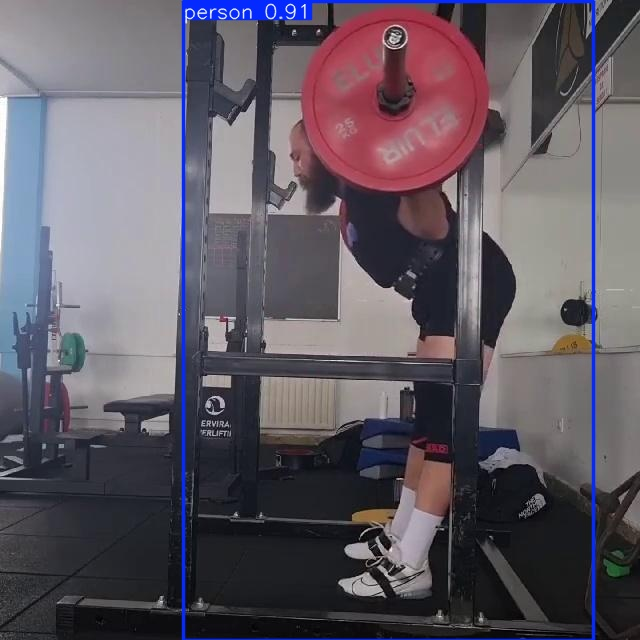

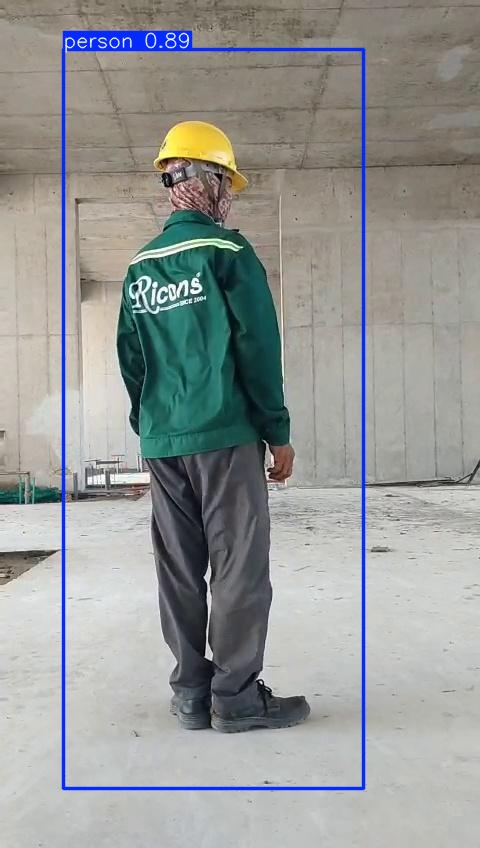

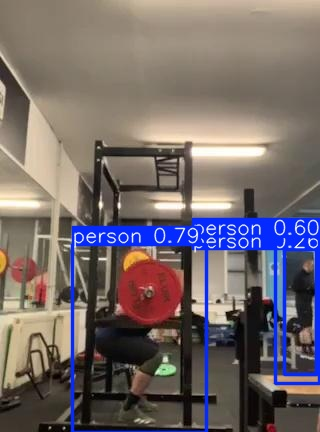

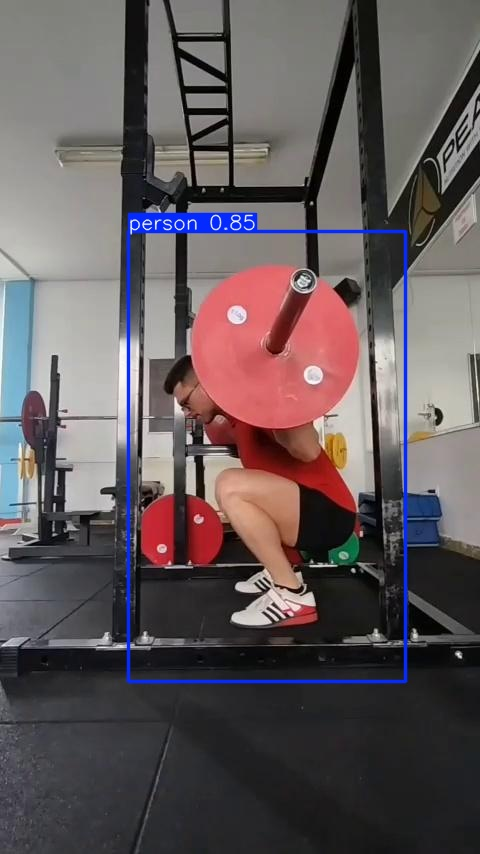

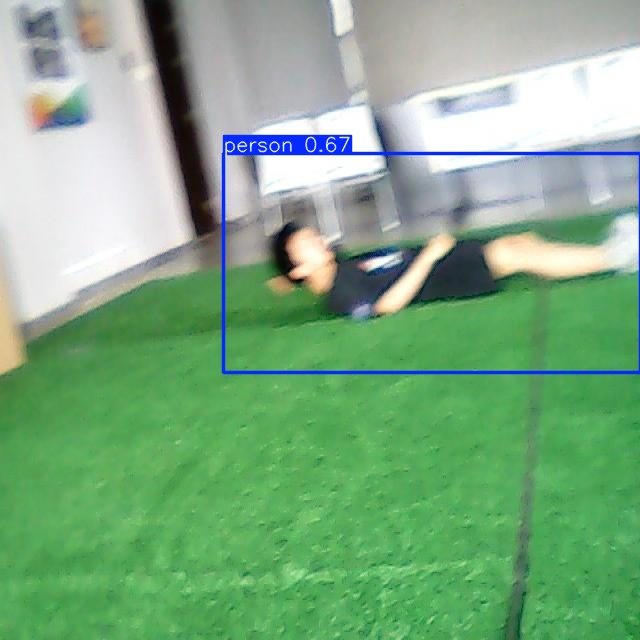

In [8]:
import os
import random
from ultralytics import YOLO
from IPython.display import Image, display

# Load the trained YOLOv8 model
model_path = '/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/best.pt'
model = YOLO(model_path)

# Directory containing test images
test_img_dir = '/content/drive/MyDrive/yolo_v8_only/person/images/test'
all_test_imgs = [os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png'))]

# Randomly select N images to predict
num_images_to_predict = 5
selected_imgs = random.sample(all_test_imgs, num_images_to_predict)

# Run predictions
results = model.predict(
    source=selected_imgs,
    imgsz=640,
    conf=0.25,
    save=True  # Saves output to /content/runs/detect/predict
)

# Correct prediction output directory
predict_dir = '/content/runs/detect/predict'

# Display results
print(f"\nShowing predictions for {num_images_to_predict} randomly selected images:\n")
for img in os.listdir(predict_dir):
    if img.endswith(('.jpg', '.png')):
        display(Image(filename=os.path.join(predict_dir, img)))



image 1/1 /content/drive/MyDrive/test_yeongmin/yeongmin4.png: 640x320 3 persons, 334.0ms
Speed: 5.1ms preprocess, 334.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)


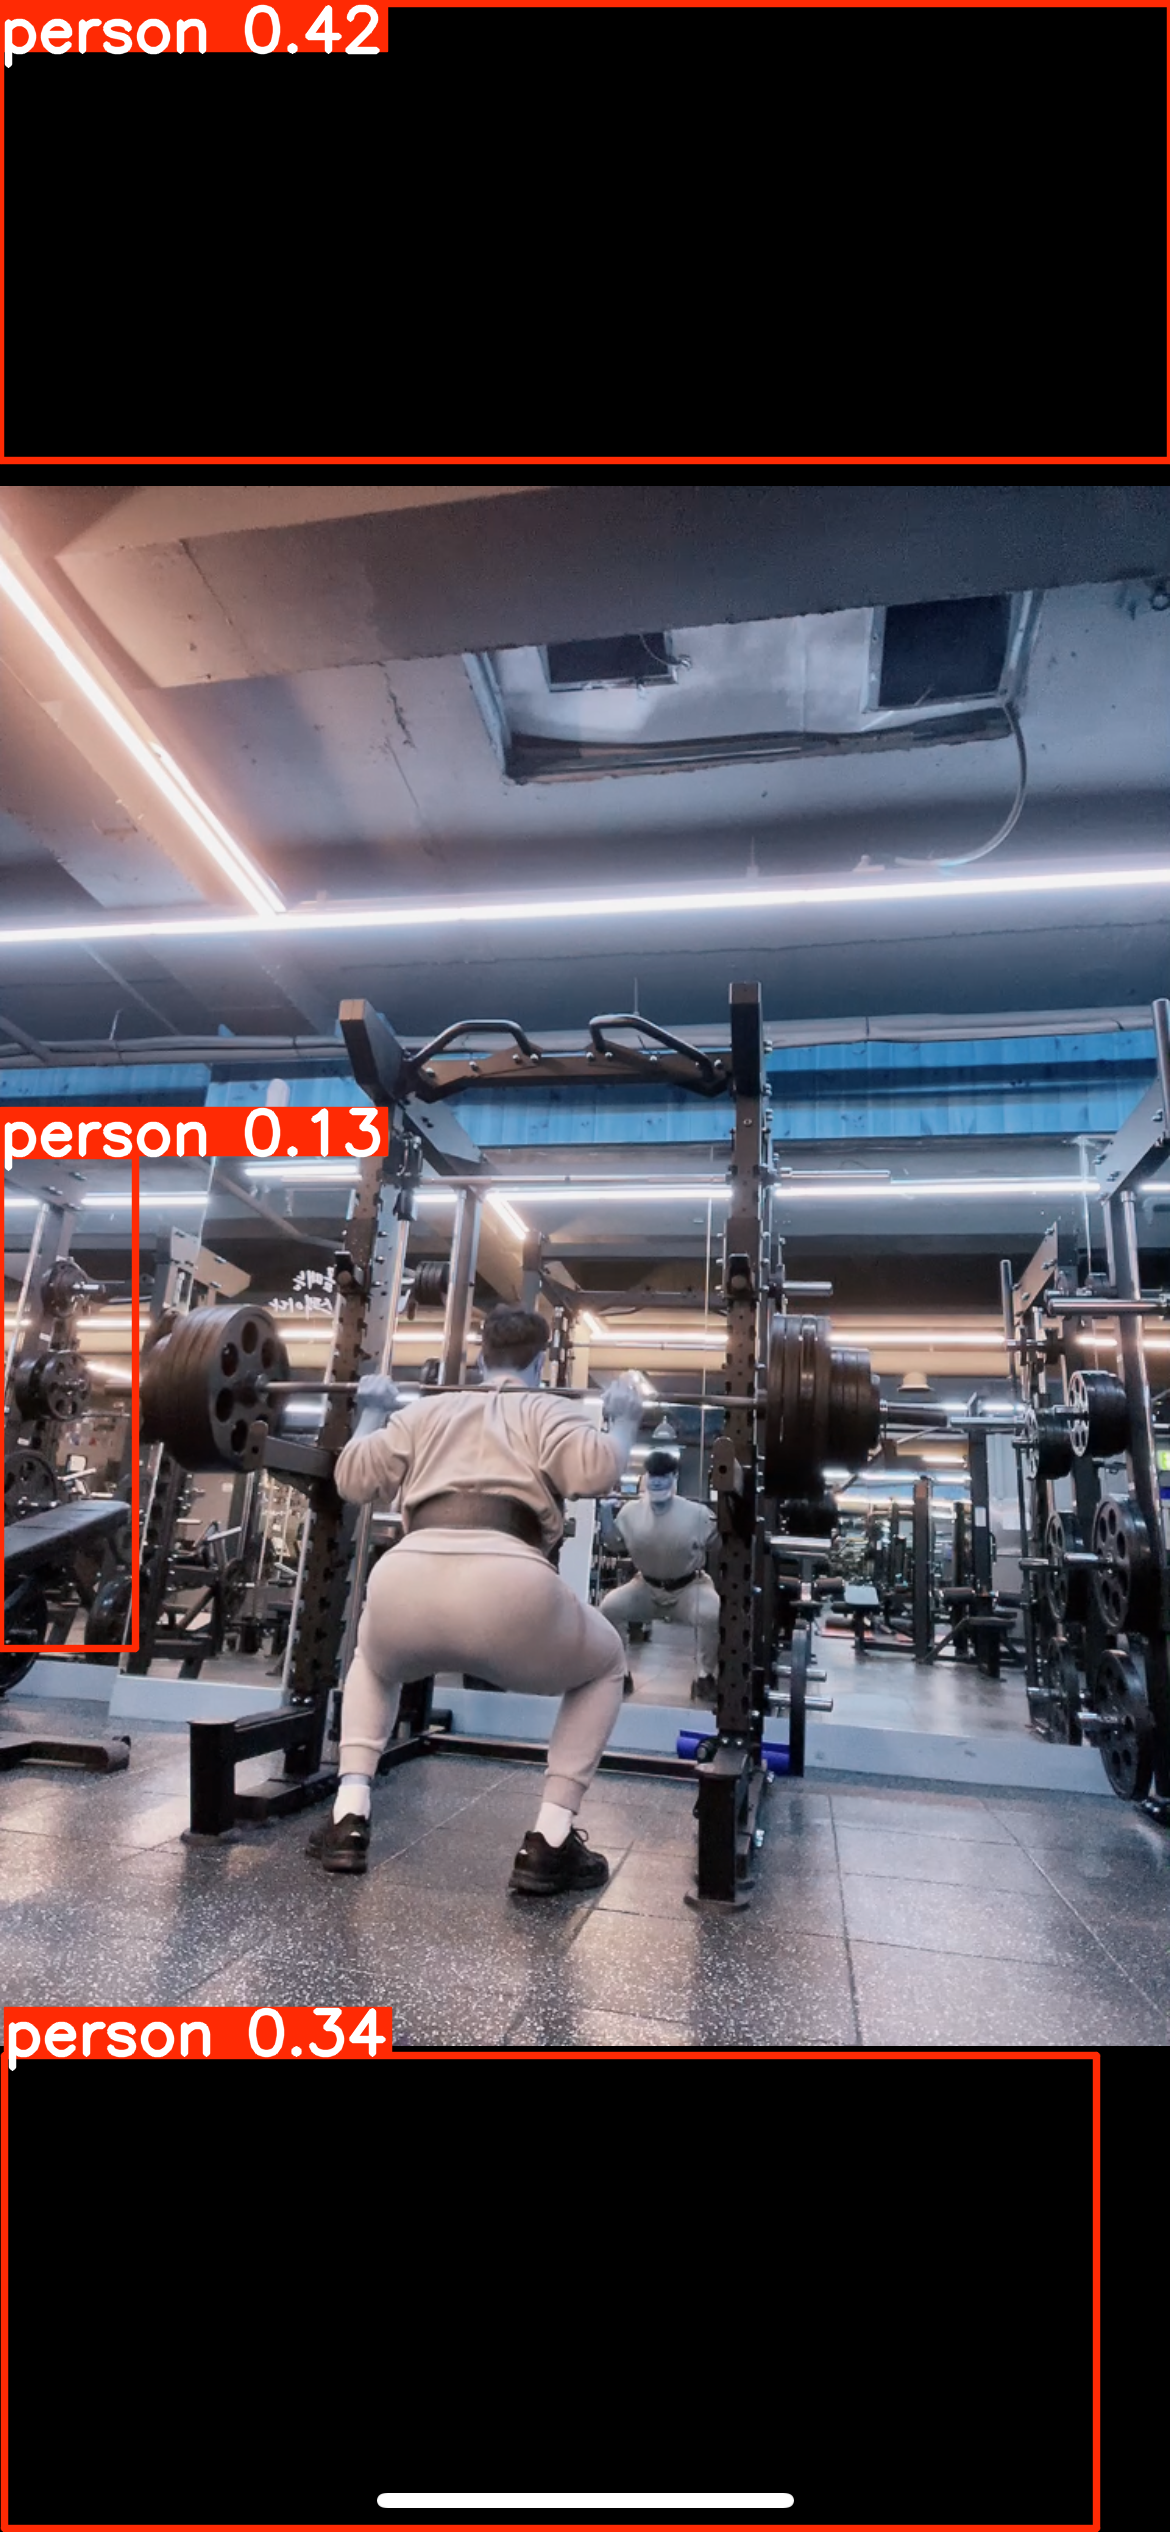

In [16]:
from ultralytics import YOLO
from PIL import Image
import cv2

# Load the model
model_path = '/content/drive/MyDrive/yolo_results/yolov8_person_mixed/weights/best.pt'
model = YOLO(model_path)

# Run prediction on the uploaded image
image_path = '/content/drive/MyDrive/test_yeongmin/yeongmin4.png'
results = model.predict(source=image_path, imgsz=640, conf=0.1, save=False)

# Show annotated image using PIL (no matplotlib to avoid reshaping/resizing)
for r in results:
    img_annotated = Image.fromarray(r.plot())  # this is a PIL image
    display(img_annotated)



In [17]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.31 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (11931/11931), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-21 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 2532x1170 1 person
Speed: 8.7ms pre-process, 184.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 320)


         xmin         ymin        xmax         ymax  confidence  class    name
0  464.559784  1293.716187  921.924744  1815.629272    0.876207      0  person


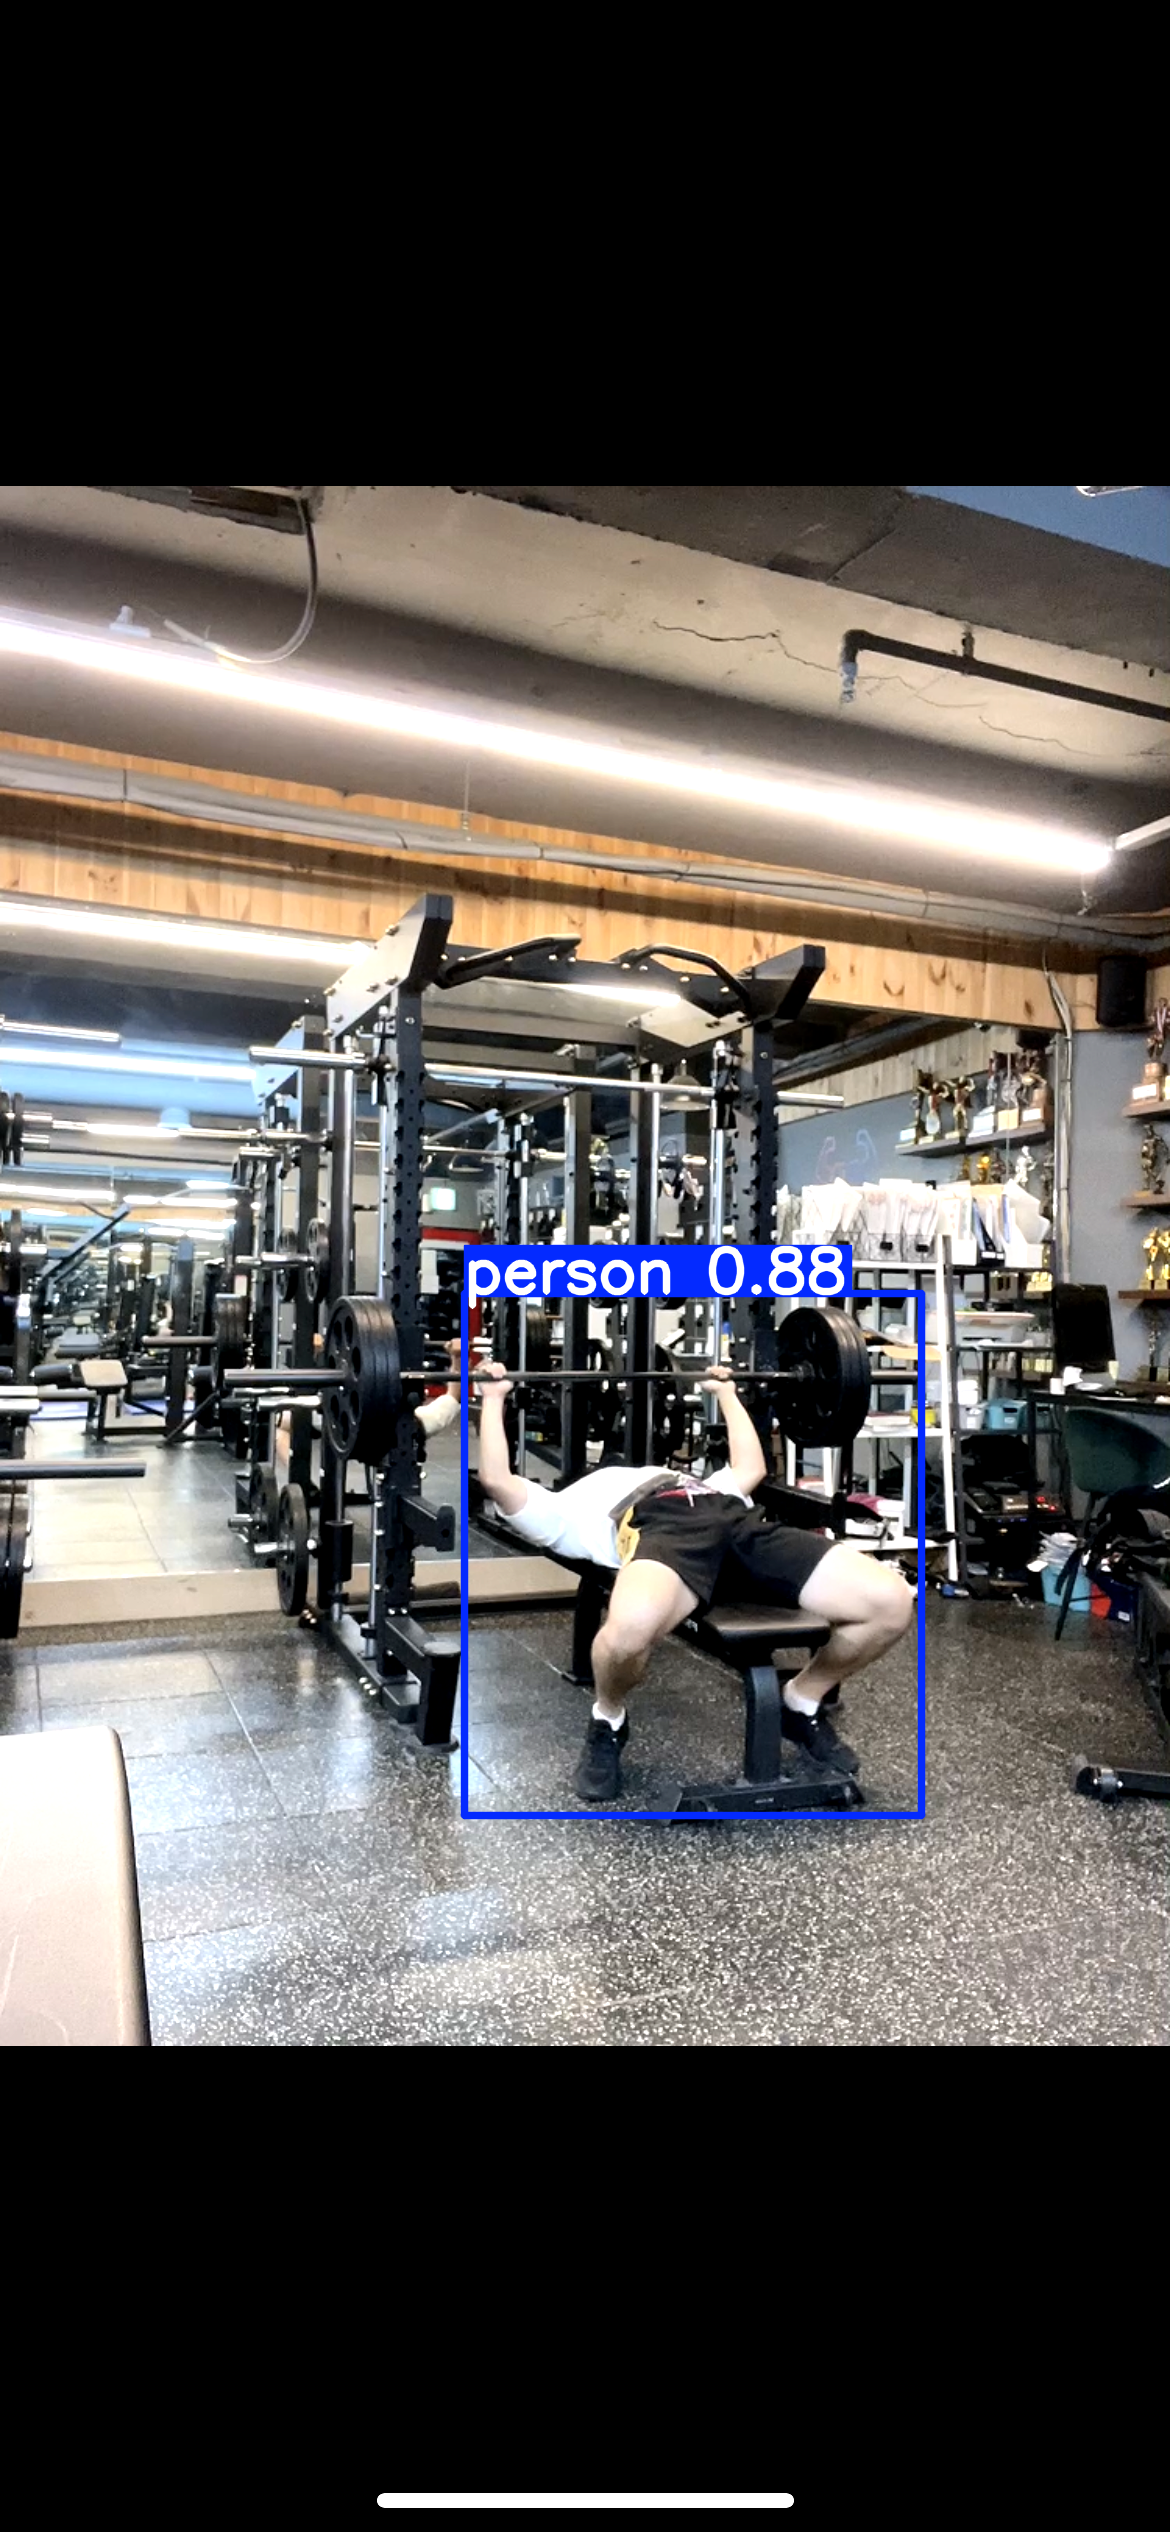

In [27]:
import torch
from PIL import Image, ImageEnhance
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv5 custom model
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='/content/drive/MyDrive/best_tight_bounding.pt',
                       trust_repo=True)

# Set confidence & IoU thresholds
model.conf = 0.05  # Lowered confidence threshold for weak detections
model.iou = 0.45
model.eval()
model.to('cpu')     # Make sure it runs on CPU
model.float()       # Use full precision on CPU

# Function to enhance contrast
def enhance_image(image_path, contrast_factor=1.5):
    img = Image.open(image_path).convert("RGB")
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(contrast_factor)
    return enhanced_img

# Inference function for Colab
def run_inference_colab(image_path):
    img = enhance_image(image_path)  # Apply contrast enhancement

    results = model(img, size=640)

    # Print predictions to console
    results.print()
    df = results.pandas().xyxy[0]
    print(df)

    # Render and show result in Colab
    rendered_img = results.render()[0]
    rendered_img = cv2.cvtColor(rendered_img, cv2.COLOR_RGB2BGR)
    cv2_imshow(rendered_img)

# Example usage
run_inference_colab("/content/drive/MyDrive/test_yeongmin/yeongmin1.png")
